In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

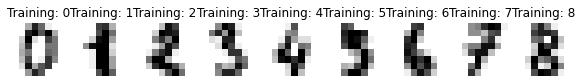

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=9, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [ ]:
# Làm phẳng hình ảnh
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Tạo bộ phân loại: bộ phân loại vector hỗ trợ
clf = svm.SVC(gamma=0.001)

# Chia dữ liệu thành 50% tập huấn luyện và 50% tập thử nghiệm
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Tìm hiểu các chữ số trên tập huấn luyện
clf.fit(X_train, y_train)

# Dự đoán chữ số trên tập thử nghiệm
predicted = clf.predict(X_test)

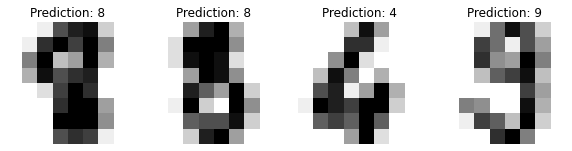

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

**THỰC HIỆN PREDICT BẰNG WEBCAM LAPTOP**

Chụp ảnh từ webcam laptop

In [ ]:
#Code from Google Colab / Code snippets
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


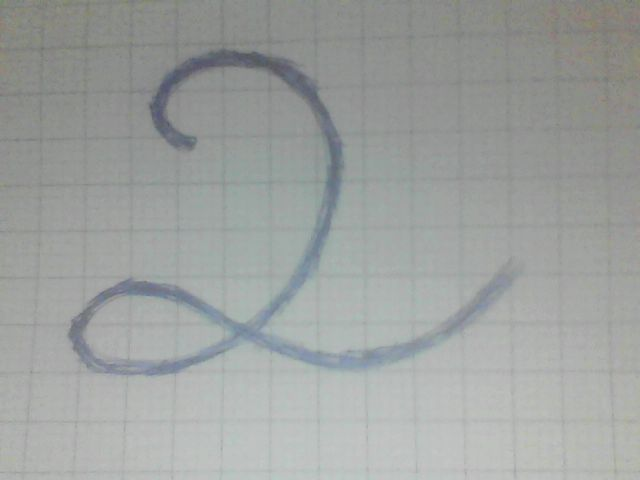

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2
import numpy as np

image = cv2.imread("/content/photo.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # chuyển sang ảnh xám
image2 = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA) # resize kích cỡ 8x8

image3 = image2.reshape(64,)
image3 = image2.reshape(1 , -1)
print(image3)
print(X_test[1])
predicted = clf.predict(image3)
print(predicted)


[[134 137 134 137 141 140 137 132 138 138 132 132 145 145 142 138 145 147
  146 152 146 151 148 144 153 157 160 161 157 161 157 153 161 156 165 164
  172 169 162 161 162 165 165 167 175 169 174 169 172 171 179 185 183 186
  183 176 176 183 189 191 192 191 188 181]]
[ 0.  0.  6. 14. 16.  5.  0.  0.  0.  2. 16. 16. 16.  7.  0.  0.  0.  2.
 15. 16. 15.  2.  0.  0.  0.  0.  6. 16. 15.  7.  0.  0.  0.  0. 14. 10.
  6. 16.  3.  0.  0.  1. 16.  3.  0. 16.  7.  0.  0.  0. 10. 11. 11. 15.
  3.  0.  0.  0.  3. 14. 16.  6.  0.  0.]
[1]


# **Trả lời câu hỏi bài tập colab số 1**

---



Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?

*   Kết quả chạy thực tế với webcam của laptop và giấy viết tay cho kết quả không tốt.

Nhìn vào đâu để kết luận là tốt hay không?

*   Dựa vào dự đoán đầu ra cho kết quả không tốt.

Nguyên nhân:

*   Ảnh thực tế được chụp khác xa so với ảnh ví dụ được sử dụng bên trên ở nhiều mặt : chất lượng, độ tương phản, đọ nét của chữ, ...
*   Chất lượng webcam .
*   Việc tiền xử lý ảnh chưa tốt.

Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

*   Theo nhóm chúng em thì model này không thực sự tốt để có thể dùng vào các bài toán phực tạp hơn. Lý do là những vấn đề được đề cập trong phần "Nguyên nhân" ở trên.